In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
df = pd.read_csv('Train.csv', parse_dates=['Date of Joining'])
test_df = pd.read_csv('Test.csv', parse_dates=['Date of Joining'])
sample_submission = pd.read_csv('sample_submission.csv')


In [34]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [35]:
test_df.head()


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [36]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [37]:
test_df.isna().sum()


Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [38]:
## Missing values in training data for 3 columns
## Currently drop all rows with any na values
df = df.dropna(how='any')

In [39]:
df.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                    float64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

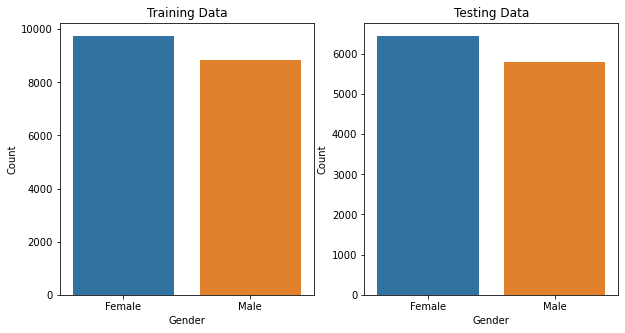

In [41]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.countplot(df['Gender'], ax = axs[0])
axs[0].set_title('Training Data')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Count')

sns.countplot(test_df['Gender'], ax = axs[1])
axs[1].set_title('Testing Data')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

In [12]:
## Gender encoding 0 for male and 1 for female
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)
test_df['Gender'] = test_df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

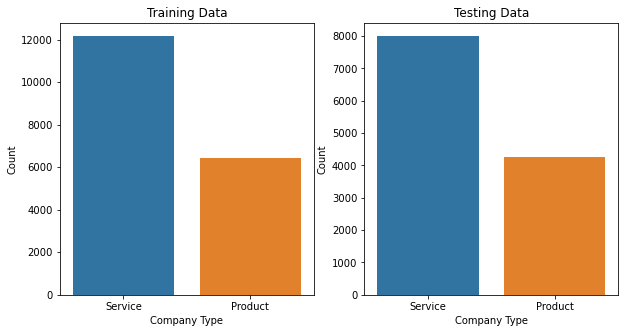

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.countplot(df['Company Type'], ax = axs[0])
axs[0].set_title('Training Data')
axs[0].set_xlabel('Company Type')
axs[0].set_ylabel('Count')

sns.countplot(test_df['Company Type'], ax = axs[1])
axs[1].set_title('Testing Data')
axs[1].set_xlabel('Company Type')
axs[1].set_ylabel('Count')

In [14]:
## Company Type is binary categorical

df['Company Type'] = df['Company Type'].apply(lambda x: 0 if x == 'Service' else 1)
test_df['Company Type'] = test_df['Company Type'].apply(lambda x: 0 if x == 'Service' else 1)


C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

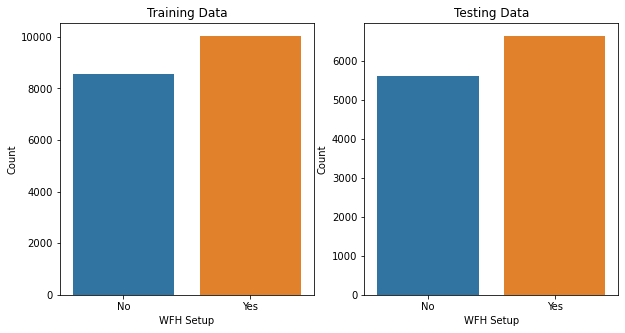

In [16]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.countplot(df['WFH Setup Available'], ax = axs[0])
axs[0].set_title('Training Data')
axs[0].set_xlabel('WFH Setup')
axs[0].set_ylabel('Count')

sns.countplot(test_df['WFH Setup Available'], ax = axs[1])
axs[1].set_title('Testing Data')
axs[1].set_xlabel('WFH Setup')
axs[1].set_ylabel('Count')



In [17]:
## WFH Encoding Binary

df['WFH Setup Available'] = df['WFH Setup Available'].apply(lambda x: 0 if x == 'No' else 1)
test_df['WFH Setup Available'] = test_df['WFH Setup Available'].apply(lambda x: 0 if x == 'No' else 1)


C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


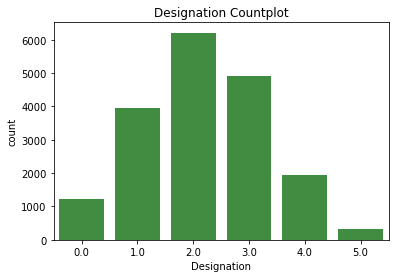

In [18]:
sns.countplot(df['Designation'], color='green', alpha = 0.8)
plt.title('Designation Countplot')


## Convert Designations to integers

df['Designation'] = df['Designation'].astype('int8')
test_df['Designation'] = test_df['Designation'].astype('int8')


C:\Users\deepi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


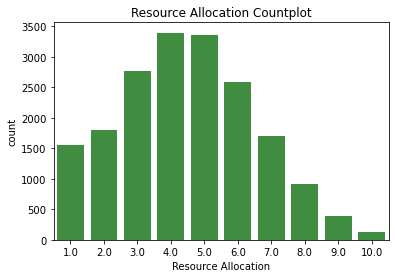

In [19]:
sns.countplot(df['Resource Allocation'], color='green', alpha = 0.8)
plt.title('Resource Allocation Countplot')

## Convert Designations to integers

df['Resource Allocation'] = df['Resource Allocation'].astype('int8')
test_df['Resource Allocation'] = test_df['Resource Allocation'].astype('int8')

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    18590.000000
mean         5.732173
std          1.920547
min          0.000000
25%          4.600000
50%          5.900000
75%          7.100000
max         10.000000
Name: Mental Fatigue Score, dtype: float64

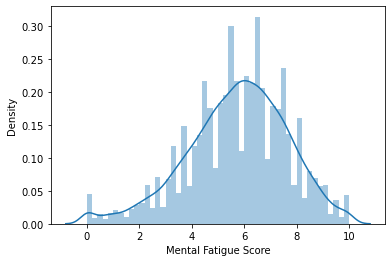

In [20]:
sns.distplot(df['Mental Fatigue Score'])
df['Mental Fatigue Score'].describe()

C:\Users\deepi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    18590.000000
mean         0.452444
std          0.197848
min          0.000000
25%          0.320000
50%          0.450000
75%          0.590000
max          1.000000
Name: Burn Rate, dtype: float64

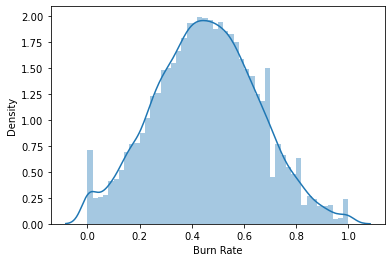

In [21]:
sns.distplot(df['Burn Rate'])
df['Burn Rate'].describe()

In [22]:
## Check range of Date variable
df['Date of Joining'].max() - df['Date of Joining'].min() ## Data over timeperiod of 1year

Timedelta('365 days 00:00:00')

In [23]:
### Moving 'Date of Joining' start from zero and Min max scale manually

df['Date of Joining'] = df['Date of Joining'].apply(lambda x: x- df['Date of Joining'].min())
df['Date of Joining'] = df['Date of Joining'].apply(lambda x: x.days)
df['Date of Joining'] = df['Date of Joining'].apply(lambda x: x/365)

test_df['Date of Joining'] = test_df['Date of Joining'].apply(lambda x: x- test_df['Date of Joining'].min())
test_df['Date of Joining'] = test_df['Date of Joining'].apply(lambda x: x.days)
test_df['Date of Joining'] = test_df['Date of Joining'].apply(lambda x: x/365)

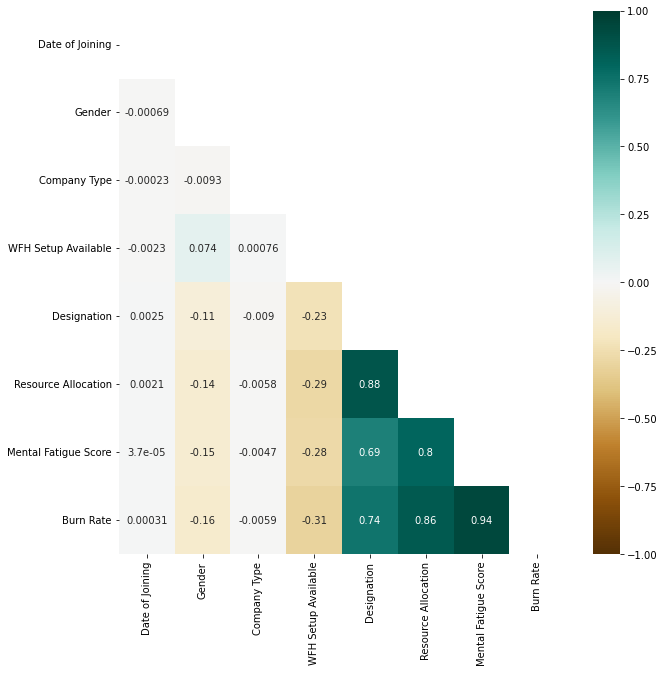

In [24]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df.corr(), mask=mask,
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [25]:
X = df.drop(['Burn Rate','Employee ID'], axis='columns')
y = df['Burn Rate']

t = test_df.drop(['Employee ID'], axis='columns')

In [26]:
t.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0.942466,1,0,0,2,5,7.7
1,0.619178,1,1,1,1,2,5.2
2,0.868493,0,1,1,1,3,5.9
3,0.101370,1,0,0,3,6,4.6
4,0.542466,1,1,0,2,5,6.4


In [27]:
#Model building, training and making predictions

pf = PolynomialFeatures(2) ## sklearn class for making polynomial features of input variables
X = pf.fit_transform(X.drop('Gender', axis=1))
t = pf.transform(t.drop('Gender', axis=1))
lr = LinearRegression() ## Model Build
lr.fit(X,y)
lr.score(X,y)

0.9244848691860754

In [28]:
predictions = lr.predict(t)

In [29]:
#Creating a submission file

def create_submission(file_name, predictions):
    pred = pd.DataFrame(predictions, index=test_df['Employee ID'], columns=['Burn Rate'])
    pred.reset_index(inplace=True)
    pred.to_csv(file_name + '.csv', index=False)

In [30]:
create_submission('PolyRegression deg2', predictions)
pd.read_csv('PolyRegression deg2.csv').head()

,Employee ID,Burn Rate
0,fffe31003300390039003000,0.616535
1,fffe31003300310037003800,0.342306
2,fffe33003400380035003900,0.416882
3,fffe3100370039003200,0.396986
4,fffe32003600390036003700,0.513864
